# KNN

In [1]:
from sklearn.datasets import load_iris 

from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sn


C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_560\2185401187.py:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load the Data

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Create the DataFrame

In [8]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.to_csv("iris.csv", index = False)

# Plot Some Data

In [10]:
df_setosa = df[:50]
df_versicolor = df[50:100]
df_virginica = df[100:150]



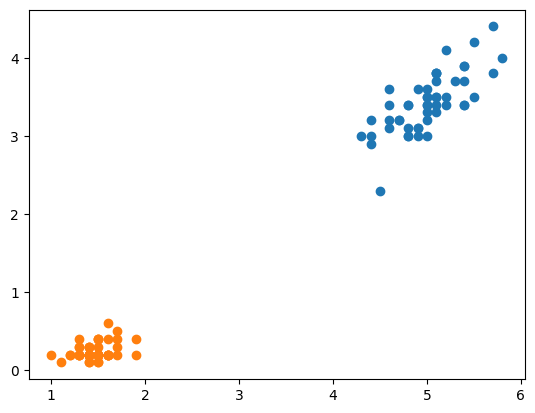

In [11]:
plt.scatter(df_setosa["sepal length (cm)"], df_setosa["sepal width (cm)"])
plt.scatter(df_setosa["petal length (cm)"], df_setosa["petal width (cm)"])

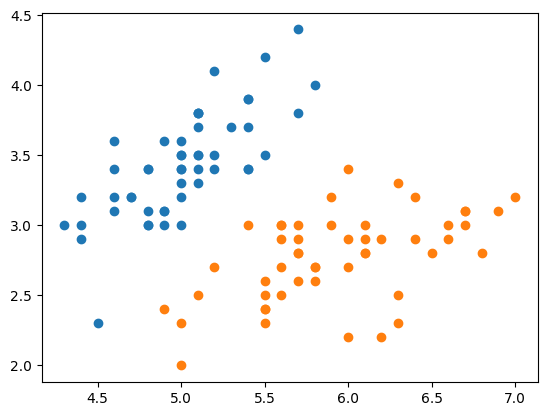

In [13]:
plt.scatter(df_setosa["sepal length (cm)"], df_setosa["sepal width (cm)"]  )
plt.scatter(df_versicolor["sepal length (cm)"], df_versicolor["sepal width (cm)"]  )

# Split the Data

In [15]:
X = df.drop(["target"], axis = "columns")
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [16]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

120
30
120
30


# Build and train the model

In [17]:
model = KNeighborsClassifier(n_neighbors= 3)
model = KNeighborsClassifier(n_neighbors= 5)
model = KNeighborsClassifier(n_neighbors= 7)

model.fit(X_train, y_train)

KNeighborsClassifier()

# Scoring

In [18]:
model.score(X_test, y_test)

1.0

# Predictions

In [19]:
model.predict([[4.3 , 3.1, 1.7 , 0.4]])  # ---> 0 : Setosa

c:\Python\Python3117\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

# Confusion Matrix

In [20]:
y_predicted = model.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)

Text(50.722222222222214, 0.5, 'True')

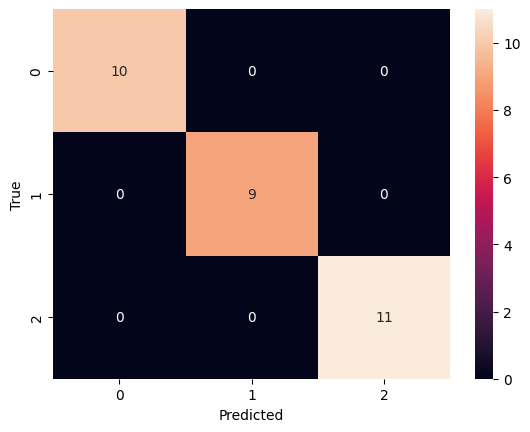

In [21]:
sn.heatmap(cm , annot = True)

plt.xlabel("Predicted")
plt.ylabel("True")